# **Gaussian Quadrature Method**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In numerical analysis, an $n$-point *Gaussian quadrature method* is a constructed to yield an exact result for polynomials of degree $2n-1$ or less by a suitable choice of the support points $x_i$ and the weights $\omega_i$ for $i = 1, ..., n$. This numerical method is defined by
<br>
$\int_{-1}^{1} f(x) dx \approx \sum_{i=1}^{n} \omega_i f(x_i)$
<br>
In general, it can be assumed that the approximation improves as the number of support points increases. Often, an approximation is required that is accurate up to a certain error tolerance 𝜖.


## *Find the support points and their weights*

For a given number $n$, the support points $x_1,...,x_n$ are the eigenvalues of the symmetrical tridiagonal Matrix $A \in \mathbb{R}^{n \times n}$
<br>
$A =
\begin{pmatrix}
0 & \beta_1 & 0 & \cdots & 0 \\
\beta_1 & 0 & \beta_2 & \cdots & 0 \\
0 & \beta_2 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \beta_{n-1} \\
0 & 0 & 0 & \beta_{n-1} & 0
\end{pmatrix},
\quad \text{where} \quad \beta_k = {\frac{k}{\sqrt{4k^2 - 1}}}$

In [34]:
# Create symmetrical tridiagonal matrix
def matrix_A(n):
    # Initialize an n x n matrix with zeros
    A = np.zeros((n, n))
    
    # Fill the off-diagonal entries
    for k in range(1, n):  # k ranges from 1 to n-1
        beta_k = k / np.sqrt((4 * k**2 - 1))
        A[k - 1, k] = beta_k  # Upper diagonal
        A[k, k - 1] = beta_k  # Lower diagonal

    return A

If $A = Z \Lambda Z^T$ is the factorization of $A$ (i.e., $\Lambda = diag(x_1,...,x_n)$ are the eigenvalues, and $Z$ is the orthonormal eigenvector matrix, the weights $\omega_i$ can be obtained from the first row of $Z$. It holds that
<br>
$\omega_i = 2(z_{1.i})^2, \quad i =1,...,n$
<br>
Note that the above formula is valid for the integral limits $[-1,1]$. For integral limits $[a,b]$, the values for $\omega_i$ and $x_i$ must be transformed.

In [29]:
def find_nodes_and_weights(n,a,b):
    A = matrix_A(n)
    eigenvalues, eigenvectors = np.linalg.eig(A)
    nodes = eigenvalues
    weights = 2 * (eigenvectors[0, :])**2   # First row of Z

    # Transformed support points and weights from [-1,1] to [a,b]
    transformed_nodes = 0.5 * (b - a) * nodes + 0.5 * (a + b)   # (b-a)/2:scale(size of the interval)  (a+b)/2:midpoint of the intrval
    transformed_weights = 0.5 * (b - a) * weights   # 2:size of interval [-1,1]  (b-a):size of interval [a,b]
    
    return transformed_nodes, transformed_weights

We now implement the Gaussian Quadrature method.

In [30]:
def gaussq_n(f, a, b, n):
    nodes, weights = find_nodes_and_weights(n,a,b)
    integral = sum(weights * f(nodes))
    
    return integral

## *Termination criterion via Error tolerance*

We want to let the method decide the necessary number of support points by initially asserting an error tolenrance. To do this, the number of support points is iteratively increased until the tolerance is met. The termination criterion is given by:
<br>
$|Q_{n+1}-Q_n| \leq tol$

In [31]:
def gaussq_tol(f, a, b, tol):
    nodes_num = 1   # Initial number of support points
    current_integral = gaussq_n(f, a, b, nodes_num)
    
    while True:
        nodes_num += 1 
        next_integral = gaussq_n(f, a, b, nodes_num)
        
        # When the difference exceeds tolerance, stop the iteration
        if abs(next_integral - current_integral) <= tol:
            break  
        
        # Update integral
        current_integral = next_integral
    
    return nodes_num

## *Test*

Test the implementation on the following integrals:

$\int_{-1}^{1} x^{10} \, dx = \frac{2}{11}$

$\int_{0}^{\pi} sin(x) \, dx = 2$

$\int_{-2}^{3} \frac {1}{10^{-2}+x^2} \, dx = 10 \cdot \arctan(20) + 10 \cdot \arctan(30)$

In [32]:
def f1(x):
    return x**10

def f2(x):
    return np.sin(x)

def f3(x):
    return 1 / (10**-2 + x**2)

In [37]:
N = 50 # N: number of support points
print(f"n = {N}")

result_1 = gaussq_n(f1, -1, 1, N) 
analytical_result_1 = 2 / 11
print(f"gaussq_n_integral of f1: {result_1} (analytical_result: {analytical_result_1})")
    
result_2 = gaussq_n(f2, 0, np.pi, N) 
analytical_result_2 = 2
print(f"gaussq_n_integral von f2: {result_2} (analytical_result: {analytical_result_2})")
    
result_3 = gaussq_n(f3, -2, 3, N) 
analytical_result_3 = 10 * np.arctan(20) + 10 * np.arctan(30)
print(f"gaussq_n_integral von f3: {result_3} (analytical_result: {analytical_result_3})")

n = 50
gaussq_n_integral of f1: 0.1818181818181834 (analytical_result: 0.18181818181818182)
gaussq_n_integral von f2: 1.9999999999999956 (analytical_result: 2)
gaussq_n_integral von f3: 30.46601973790952 (analytical_result: 30.583132619896034)


In [38]:
tol = 1e-8
print(f"tolerance = {tol}")

nodes_num_1 = gaussq_tol(f1, -1, 1, tol) 
result_1 = gaussq_n(f1,-1,1,nodes_num_1)
analytical_result_1 = 2 / 11
print(f"n={nodes_num_1}, gaussq_tol_integral of f1: {result_1} (analytical_result: {analytical_result_1})")

nodes_num_2 = gaussq_tol(f2, 0, np.pi, tol) 
result_2 = gaussq_n(f2, 0, np.pi, nodes_num_2)
analytical_result_2 = 2
print(f"n={nodes_num_2}, gaussq_tol_integral von f2: {result_2} (analytical_result: {analytical_result_2})")

# Integral of 1/(1+x^2) from -1 to 1
nodes_num_3 = gaussq_tol(f3, -2, 3, tol)
result_3 = gaussq_n(f3, -2, 3, nodes_num_3) 
analytical_result_3 = 10 * np.arctan(20) + 10 * np.arctan(30)
print(f"n={nodes_num_3}, gaussq_tol_integral von f3: {result_3} (analytical_result: {analytical_result_3})")


tolerance = 1e-08
n=7, gaussq_tol_integral of f1: 0.18181818181818118 (analytical_result: 0.18181818181818182)
n=7, gaussq_tol_integral von f2: 2.0000000000017915 (analytical_result: 2)
n=246, gaussq_tol_integral von f3: 30.583132594196687 (analytical_result: 30.583132619896034)


## *Relation between error and number of support points*

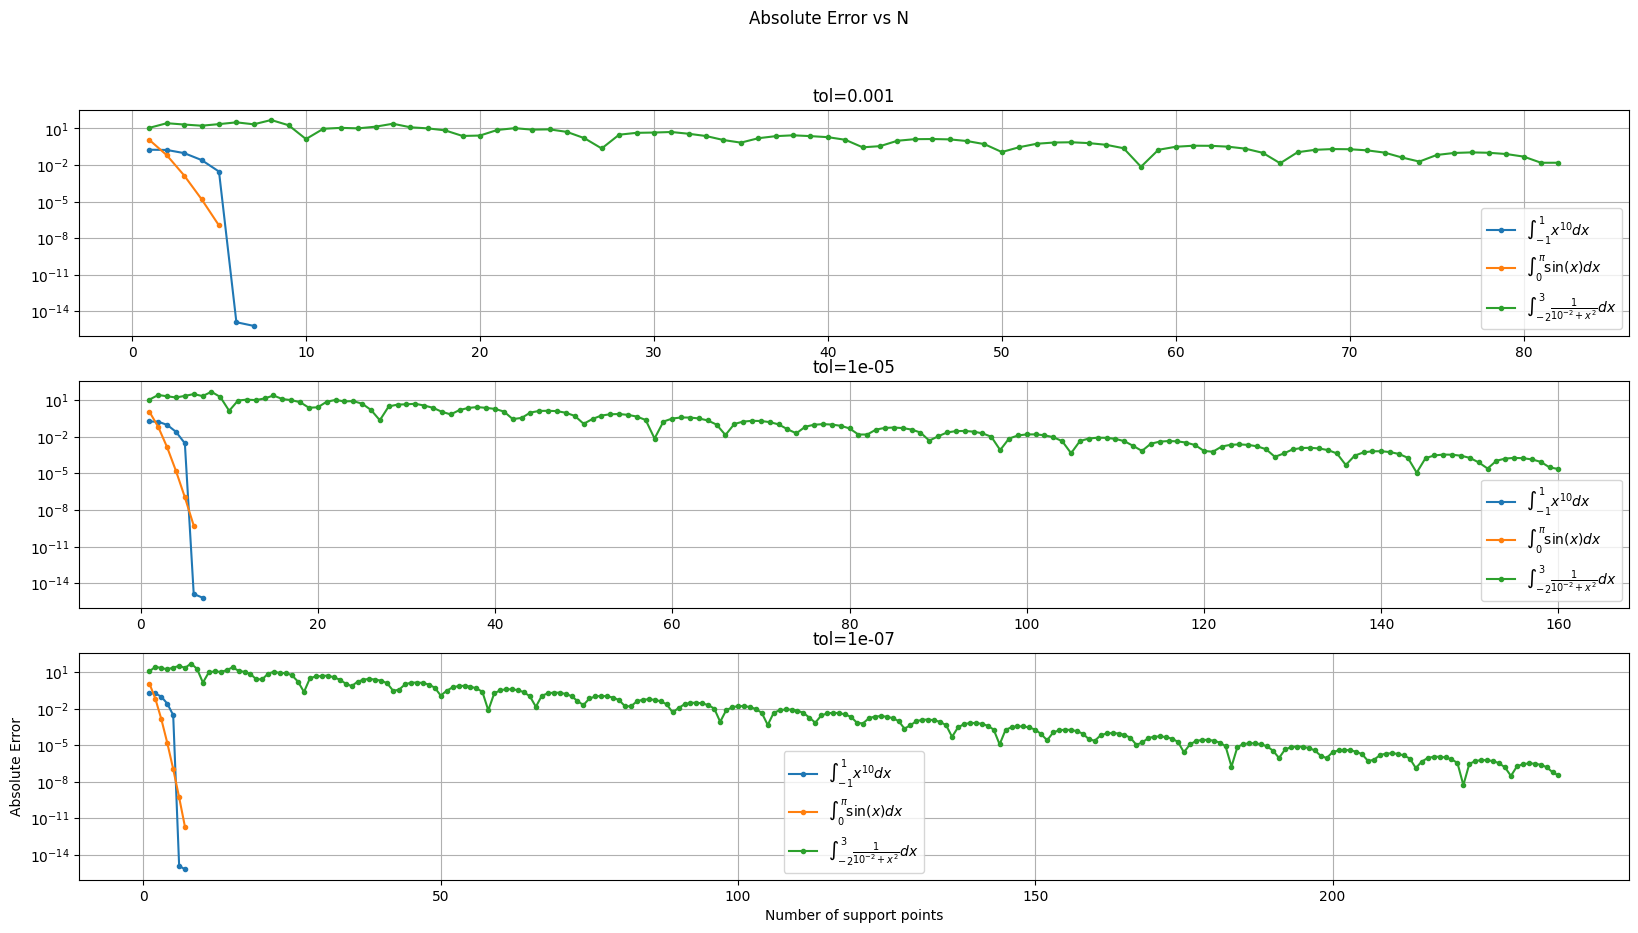

In [42]:
# Error tolerances
tol_list = [1e-3, 1e-5, 1e-7]

# Analytical result
analytical_result_f1 = 2 / 11
analytical_result_f2 = 2
analytical_result_f3 = 10 * np.arctan(20) + 10 * np.arctan(30)   

# Subplot 1, 2, 3
subplot_counter = 0
plt.figure(figsize=(20, 10))

for tol in tol_list:
    err_f1 = []
    err_f2 = []
    err_f3 = []

    # N_f: number of support points
    N_f1 = np.arange(1, gaussq_tol(f1, -1, 1, tol)+1)
    N_f2 = np.arange(1, gaussq_tol(f2, 0, np.pi, tol)+1)
    N_f3 = np.arange(1, gaussq_tol(f3, -2, 3, tol)+1)
    
    for n in (N_f1):
        Q_f1 = gaussq_n(f1, -1, 1, n)
        err_f1.append(abs(Q_f1 - analytical_result_f1))
    for n in (N_f2):
        Q_f2 = gaussq_n(f2, 0, np.pi, n)
        err_f2.append(abs(Q_f2 - analytical_result_f2))

    for n in (N_f3):
        Q_f3 = gaussq_n(f3, -2, 3, n)
        err_f3.append(abs(Q_f3 - analytical_result_f3))


    # Plotten

    subplot_counter += 1

    plt.subplot(3,1,subplot_counter)
    # f1(x) = x^10
    plt.semilogy(N_f1, err_f1, label=r"$\int_{-1}^{1} x^{10} dx$", marker='.')

    # f2(x) = sin(x)
    plt.semilogy(N_f2, err_f2, label=r"$\int_{0}^{\pi} \sin(x) dx$", marker='.')

    # f3(x) = 1 / (10^-2 + x^2)
    plt.semilogy(N_f3, err_f3, label=r"$\int_{-2}^{3} \frac{1}{10^{-2} + x^2} dx$", marker='.')

    # Subgrafikeinstellungen
    plt.grid(True)
    plt.legend()
    plt.title('tol='+str(tol))


# Grafikeinstellungen
plt.suptitle('Absolute Error vs N')
plt.xlabel('Number of support points')
plt.ylabel('Absolute Error')


plt.show()

## *Relation between tolerance and number of support points*

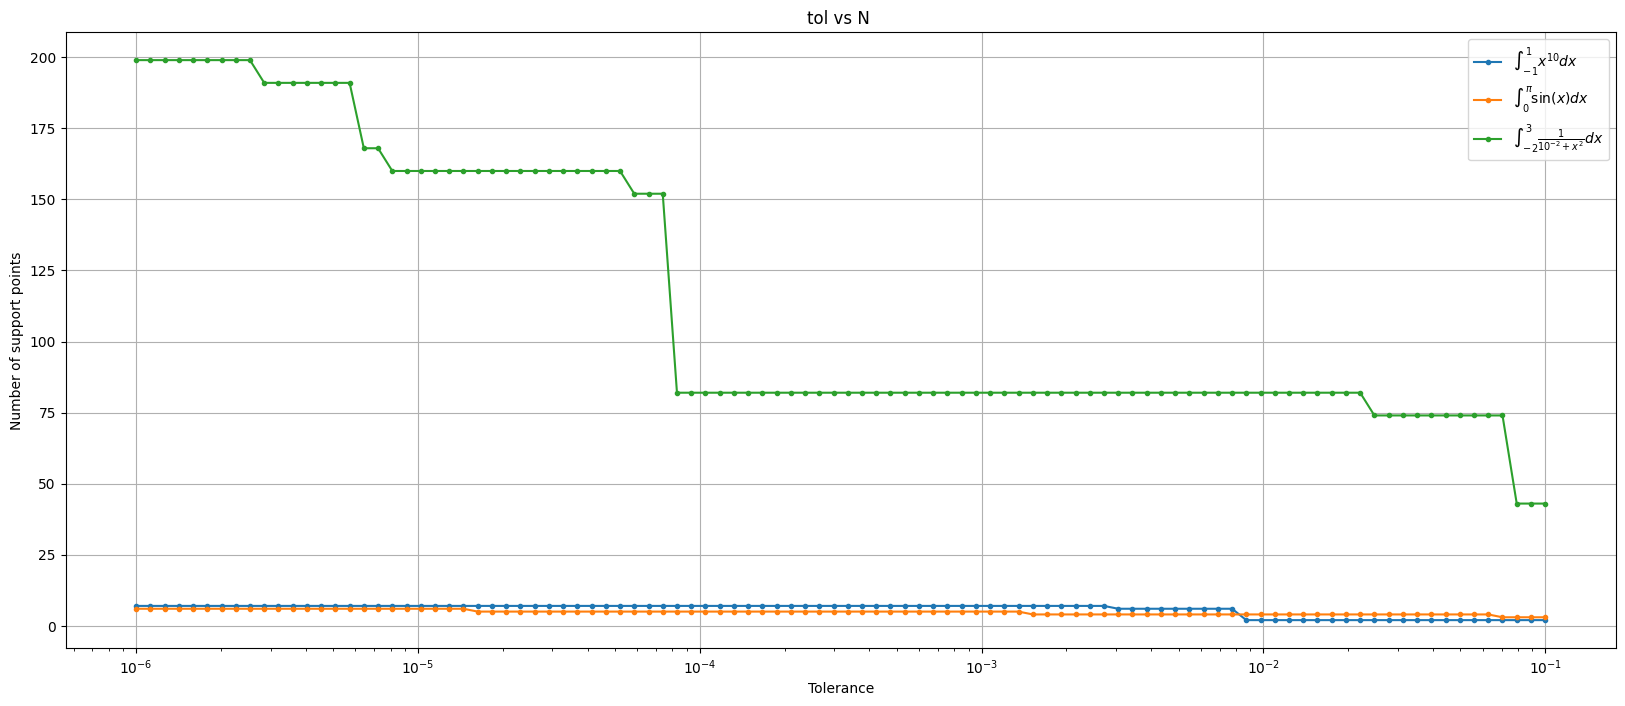

In [44]:
# Fehlertoleranzliste
tol_list = np.logspace(-6, -1, num=100)
#tol_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

N_counter_f1 = []
N_counter_f2 = []
N_counter_f3 = []

for tol in tol_list:
    N_f1 = gaussq_tol(f1, -1, 1, tol)
    N_f2 = gaussq_tol(f2, 0, np.pi, tol)
    N_f3 = gaussq_tol(f3, -2, 3, tol)
    
    N_counter_f1.append(N_f1)
    N_counter_f2.append(N_f2)
    N_counter_f3.append(N_f3)

# Plotten
plt.figure(figsize=(20, 8))

# f1(x) = x^10
plt.semilogx(tol_list, N_counter_f1, label=r"$\int_{-1}^{1} x^{10} dx$", marker='.')

# f2(x) = sin(x)
plt.semilogx(tol_list, N_counter_f2, label=r"$\int_{0}^{\pi} \sin(x) dx$", marker='.')

# f3(x) = 1 / (10^-2 + x^2)
plt.semilogx(tol_list, N_counter_f3, label=r"$\int_{-2}^{3} \frac{1}{10^{-2} + x^2} dx$", marker='.')

# Grafikeinstellungen
plt.xlabel('Tolerance')
plt.ylabel('Number of support points')
plt.title('tol vs N ')
plt.legend()
plt.grid(True)


plt.show()

# *Conclusion*

The Gaussian quadrature method is a highly efficient numerical technique for approximating the definite integral of a function. It uses a set of specific, carefully chosen sample points (nodes) and associated weights to calculate the integral. These nodes and weights are derived from the roots of orthogonal polynomials, typically the Legendre polynomials for the standard interval $[−1,1]$.

The key advantage of Gaussian quadrature is that it can achieve high accuracy with relatively few sample points compared to other numerical integration methods, such as the trapezoidal or Simpson's rule. The method is especially effective when the integrand is smooth and well-behaved. Moreover, the quadrature formula can be adapted to different intervals by appropriate transformations of the nodes and weights.

However, for more complex or non-smooth functions, or when higher precision is required, Gaussian quadrature may not always be the best option. In those cases, adaptive quadrature methods or higher-order Gaussian quadratures can be considered. Nevertheless, for many standard applications, the Gaussian quadrature provides an excellent balance between computational efficiency and accuracy.